<center><h1> <strong> ICFES: Predictive model based on <br/> Socioeconomic status, cultural capital and inequality </strong>
 </h1>

<center><h2>Data Minning <br/> Second Report </h2>
<center><h3>Universidad Nacional de Colombia</h3>
<center><h4>November 2022</h4>

-------
-------

by: 

Jerson Mauricio Caviendes

Javier Eduardo Duarte Aunta

-------
-------

# 1. Agrupación

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn import svm, metrics
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute 

# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score
df1 = pd.read_csv('/content/drive/Shared drives/Minería de Datos/Datos/ICFES_t_2022-11-06.csv', sep = ';', low_memory=False )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1.head()

In [ ]:
Predictors= ['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_REGI_RESIDE_B0' ,'ESTU_REGI_RESIDE_B1' ,'ESTU_REGI_RESIDE_B2', 'ESTU_REGI_RESIDE_B3' ,'ESTU_REGI_RESIDE_B4', 'ESTU_REGI_RESIDE_B5','FAMI_ESTRATOVIVIENDA','FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR' ,'FAMI_EDUCACIONPADRE', 'FAMI_TRABAJOLABORPADRE_B10', 'FAMI_TRABAJOLABORPADRE_B9', 'FAMI_TRABAJOLABORPADRE_B8', 'FAMI_TRABAJOLABORPADRE_B7',	'FAMI_TRABAJOLABORPADRE_B6',	'FAMI_TRABAJOLABORPADRE_B5', 'FAMI_TRABAJOLABORPADRE_B4',	'FAMI_TRABAJOLABORPADRE_B3',	'FAMI_TRABAJOLABORPADRE_B2',	'FAMI_TRABAJOLABORPADRE_B1',	'FAMI_TRABAJOLABORPADRE_B0', 'FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORMADRE_B12', 'FAMI_TRABAJOLABORMADRE_B11', 'FAMI_TRABAJOLABORMADRE_B10', 'FAMI_TRABAJOLABORMADRE_B9',	'FAMI_TRABAJOLABORMADRE_B8', 'FAMI_TRABAJOLABORMADRE_B7', 'FAMI_TRABAJOLABORMADRE_B6', 'FAMI_TRABAJOLABORMADRE_B5',	'FAMI_TRABAJOLABORMADRE_B4', 'FAMI_TRABAJOLABORMADRE_B3',	'FAMI_TRABAJOLABORMADRE_B2',	'FAMI_TRABAJOLABORMADRE_B1',	'FAMI_TRABAJOLABORMADRE_B0','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV' ,'FAMI_TIENECOMPUTADOR','FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS','FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE','FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET','ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION_B5', 'ESTU_TIPOREMUNERACION_B4',	'ESTU_TIPOREMUNERACION_B3' ,'ESTU_TIPOREMUNERACION_B2' ,'COLE_GENERO_B2', 'COLE_GENERO_B1', 'COLE_GENERO_B0', 'COLE_NATURALEZA', 'COLE_CALENDARIO_B2', 'COLE_CALENDARIO_B1', 'COLE_CALENDARIO_B0', 'COLE_BILINGUE', 'COLE_CARACTER_B4', 'COLE_CARACTER_B3',	'COLE_CARACTER_B2', 'COLE_CARACTER_B1',	'COLE_CARACTER_B0', 'COLE_AREA_UBICACION', 'COLE_JORNADA_B5', 'COLE_JORNADA_B4', 'COLE_JORNADA_B3', 'COLE_JORNADA_B2', 'COLE_JORNADA_B1', 'COLE_JORNADA_B0',]

In [ ]:
X = df1[Predictors]
Y2 = df1["TWO_GLOBAL_SCORE"]
Y3 = df1["THREE_GLOBAL_SCORE"]
Y3 = Y3 - 1

In [ ]:
X.head()

ESTU_GENERO  ESTU_TIENEETNIA  ESTU_REGI_RESIDE_B0  ESTU_REGI_RESIDE_B1  \
0            0                1                    0                    0   
1            0                1                    0                    1   
2            0                2                    0                    0   
3            0                1                    0                    1   
4            0                1                    0                    0   

   ESTU_REGI_RESIDE_B2  ESTU_REGI_RESIDE_B3  ESTU_REGI_RESIDE_B4  \
0                    1                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   ESTU_REGI_RESIDE_B5  FAMI_ESTRATOVIVIENDA  FAMI_PERSONASHOGAR  ...  \
0                    0                  0.00                0.50  ...   
1                    0                  0.33                0.25  ...   
2                    0                  0.50                0.25  ...   
3                    0                  0.33                0.25  ...   
4                    0                  0.00                0.75  ...   

   COLE_CARACTER_B2  COLE_CARACTER_B1  COLE_CARACTER_B0  COLE_AREA_UBICACION  \
0                 0                 0                 0                    1   
1                 0                 0                 0                    1   
2                 0                 1                 0                    1   
3                 0                 0                 0                    1   
4                 0                 0                 0                    1   

   COLE_JORNADA_B5  COLE_JORNADA_B4  COLE_JORNADA_B3  COLE_JORNADA_B2  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   COLE_JORNADA_B1  COLE_JORNADA_B0  
0                1                0  
1                1                0  
2                1                0  
3                0                0  
4                1                0  

[5 rows x 77 columns]

In [ ]:
!pip install scprep phate umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn.manifold
from sklearn.decomposition import PCA


pca = PCA(n_components = 41)
X_pca = pca.fit_transform(X)

#tsne_op = sklearn.manifold.TSNE(n_components=2, perplexity=100)
#data_tsne = tsne_op.fit_transform(X_pca)

In [ ]:
#import pandas as pd

#data = pd.DataFrame(data=data_tsne)
#data.columns=["tsne1", "tsne2"]
#data.to_csv('/content/drive/Shared drives/Minería de Datos/Datos/tsne.csv',  header=True, index=True)

# K-means

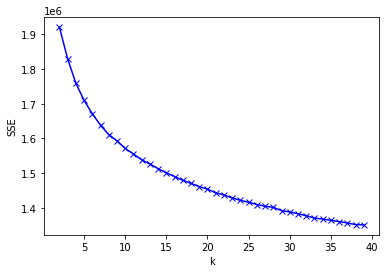

In [ ]:
from sklearn import cluster
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(2,40)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(X_pca)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### K-means con 2 clusters

In [ ]:
from sklearn import cluster
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

n_clusters = 2
km = cluster.KMeans(n_clusters)
km.fit(X_pca)
y = km.predict(X_pca)


In [ ]:
data = pd.DataFrame(X_pca)
data = data.assign(Class=Y2)
data= data.assign(predict=y)

In [ ]:
K1_C0 = data[(data['Class']==0) & (data['predict']==0)]
K2_C0 = data[(data['Class']==0) & (data['predict']==1)]
K1_C1 = data[(data['Class']==1) & (data['predict']==0)]
K2_C1 = data[(data['Class']==1) & (data['predict']==1)]
K1_C2 = data[(data['Class']==2) & (data['predict']==0)]
K2_C2 = data[(data['Class']==2) & (data['predict']==1)]


K1_C0_ = K1_C0.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C1_ = K1_C1.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C2_ = K1_C2.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])

K2_C0_ = K2_C0.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C1_ = K2_C1.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C2_ = K2_C2.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])


K1_D = (max( K1_C0_, K1_C1_, K1_C2_))

K2_D = (max( K2_C0_, K2_C1_, K2_C2_))

PUREZA = (K1_D + K2_D)/2

print(PUREZA)

0.6331243156618114


In [ ]:
score = silhouette_score(X_pca, y, metric='euclidean')
print('Coeficiente de silueta: %.3f' % score)
score = davies_bouldin_score(X_pca, y)
print('Indice de Davies-Bouldin: %.3f' % score)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y2, y))

              precision    recall  f1-score   support

           0       0.36      0.37      0.37    153123
           1       0.37      0.36      0.37    155424

    accuracy                           0.37    308547
   macro avg       0.37      0.37      0.37    308547
weighted avg       0.37      0.37      0.37    308547



### Visualizar los datos con T-SNE

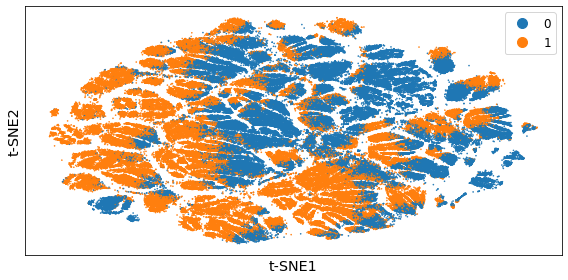

In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_tsne = pd.read_csv('/content/drive/Shared drives/Minería de Datos/Datos/tsne.csv', sep = ',', low_memory=False)
data_tsne = data_tsne[["tsne1" ,"tsne2"]]


scprep.plot.scatter2d(data_tsne, c=y,
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

### K-means con 3 clusters

In [ ]:
from sklearn import cluster
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

n_clusters = 3
km = cluster.KMeans(n_clusters)
km.fit(X_pca)
y = km.predict(X_pca)


In [ ]:
data = pd.DataFrame(X_pca)
data = data.assign(Class=Y3)
data= data.assign(predict=y)


In [ ]:
K1_C0 = data[(data['Class']==0) & (data['predict']==0)]
K2_C0 = data[(data['Class']==0) & (data['predict']==1)]
K3_C0 = data[(data['Class']==0) & (data['predict']==2)]
K1_C1 = data[(data['Class']==1) & (data['predict']==0)]
K2_C1 = data[(data['Class']==1) & (data['predict']==1)]
K3_C1 = data[(data['Class']==1) & (data['predict']==2)]
K1_C2 = data[(data['Class']==2) & (data['predict']==0)]
K2_C2 = data[(data['Class']==2) & (data['predict']==1)]
K3_C2 = data[(data['Class']==2) & (data['predict']==2)]


K1_C0_ = K1_C0.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C1_ = K1_C1.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C2_ = K1_C2.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])

K2_C0_ = K2_C0.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C1_ = K2_C1.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C2_ = K2_C2.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])

K3_C0_ = K3_C0.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C1_ = K3_C1.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C2_ = K3_C2.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])


K1_D = (max( K1_C0_, K1_C1_, K1_C2_))

K2_D = (max( K2_C0_, K2_C1_, K2_C2_))

K3_D = (max( K3_C0_, K3_C1_, K3_C2_))

PUREZA = (K1_D + K2_D + K3_D)/3

print(PUREZA)

0.4379843335169904


In [ ]:
score = silhouette_score(X_pca, y, metric='euclidean')
print('Coeficiente de silueta: %.3f' % score)
score = davies_bouldin_score(X_pca, y)
print('Indice de Davies-Bouldin: %.3f' % score)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y3, y))

              precision    recall  f1-score   support

           0       0.24      0.22      0.23    109979
           1       0.32      0.38      0.35     99155
           2       0.35      0.31      0.33     99413

    accuracy                           0.30    308547
   macro avg       0.30      0.30      0.30    308547
weighted avg       0.30      0.30      0.30    308547



### Visualizar los datos con T-SNE

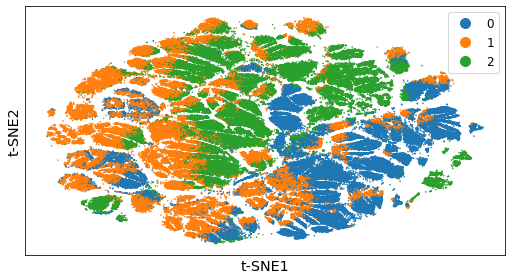

In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data_tsne = pd.read_csv('/content/drive/Shared drives/Minería de Datos/Datos/tsne.csv', sep = ',', low_memory=False)
data_tsne = data_tsne[["tsne1" ,"tsne2"]]

scprep.plot.scatter2d(data_tsne, c=y,
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

### K-means con 35 clusters según la gráfica de Elbow

In [ ]:
from sklearn import cluster
n_clusters = 35
km = cluster.KMeans(n_clusters)
km.fit(X_pca)
y = km.predict(X_pca)



In [ ]:
data = pd.DataFrame(X_pca)
data = data.assign(Class=Y3)
data= data.assign(predict=y)


In [ ]:

K1_C0 = data[(data['Class']==0) & (data['predict']==0)]
K2_C0 = data[(data['Class']==0) & (data['predict']==1)]
K3_C0 = data[(data['Class']==0) & (data['predict']==2)]
K4_C0 = data[(data['Class']==0) & (data['predict']==3)]
K5_C0 = data[(data['Class']==0) & (data['predict']==4)]
K6_C0 = data[(data['Class']==0) & (data['predict']==5)]
K7_C0 = data[(data['Class']==0) & (data['predict']==6)]
K8_C0 = data[(data['Class']==0) & (data['predict']==7)]
K9_C0 = data[(data['Class']==0) & (data['predict']==8)]
K10_C0 = data[(data['Class']==0) & (data['predict']==9)]
K11_C0 = data[(data['Class']==0) & (data['predict']==10)]
K12_C0 = data[(data['Class']==0) & (data['predict']==11)]
K13_C0 = data[(data['Class']==0) & (data['predict']==12)]
K14_C0 = data[(data['Class']==0) & (data['predict']==13)]
K15_C0 = data[(data['Class']==0) & (data['predict']==14)]
K16_C0 = data[(data['Class']==0) & (data['predict']==15)]
K17_C0 = data[(data['Class']==0) & (data['predict']==16)]
K18_C0 = data[(data['Class']==0) & (data['predict']==17)]
K19_C0 = data[(data['Class']==0) & (data['predict']==18)]
K20_C0 = data[(data['Class']==0) & (data['predict']==19)]
K21_C0 = data[(data['Class']==0) & (data['predict']==20)]
K22_C0 = data[(data['Class']==0) & (data['predict']==21)]
K23_C0 = data[(data['Class']==0) & (data['predict']==22)]
K24_C0 = data[(data['Class']==0) & (data['predict']==23)]
K25_C0 = data[(data['Class']==0) & (data['predict']==24)]
K26_C0 = data[(data['Class']==0) & (data['predict']==25)]
K27_C0 = data[(data['Class']==0) & (data['predict']==26)]
K28_C0 = data[(data['Class']==0) & (data['predict']==27)]
K29_C0 = data[(data['Class']==0) & (data['predict']==28)]
K30_C0 = data[(data['Class']==0) & (data['predict']==29)]
K31_C0 = data[(data['Class']==0) & (data['predict']==30)]
K32_C0 = data[(data['Class']==0) & (data['predict']==31)]
K33_C0 = data[(data['Class']==0) & (data['predict']==32)]
K34_C0 = data[(data['Class']==0) & (data['predict']==33)]
K35_C0 = data[(data['Class']==0) & (data['predict']==34)]

K1_C1 = data[(data['Class']==1) & (data['predict']==0)]
K2_C1 = data[(data['Class']==1) & (data['predict']==1)]
K3_C1 = data[(data['Class']==1) & (data['predict']==2)]
K4_C1 = data[(data['Class']==1) & (data['predict']==3)]
K5_C1 = data[(data['Class']==1) & (data['predict']==4)]
K6_C1 = data[(data['Class']==1) & (data['predict']==5)]
K7_C1 = data[(data['Class']==1) & (data['predict']==6)]
K8_C1 = data[(data['Class']==1) & (data['predict']==7)]
K9_C1 = data[(data['Class']==1) & (data['predict']==8)]
K10_C1 = data[(data['Class']==1) & (data['predict']==9)]
K11_C1 = data[(data['Class']==1) & (data['predict']==10)]
K12_C1 = data[(data['Class']==1) & (data['predict']==11)]
K13_C1 = data[(data['Class']==1) & (data['predict']==12)]
K14_C1 = data[(data['Class']==1) & (data['predict']==13)]
K15_C1 = data[(data['Class']==1) & (data['predict']==14)]
K16_C1 = data[(data['Class']==1) & (data['predict']==15)]
K17_C1 = data[(data['Class']==1) & (data['predict']==16)]
K18_C1 = data[(data['Class']==1) & (data['predict']==17)]
K19_C1 = data[(data['Class']==1) & (data['predict']==18)]
K20_C1 = data[(data['Class']==1) & (data['predict']==19)]
K21_C1 = data[(data['Class']==1) & (data['predict']==20)]
K22_C1 = data[(data['Class']==1) & (data['predict']==21)]
K23_C1 = data[(data['Class']==1) & (data['predict']==22)]
K24_C1 = data[(data['Class']==1) & (data['predict']==23)]
K25_C1 = data[(data['Class']==1) & (data['predict']==24)]
K26_C1 = data[(data['Class']==1) & (data['predict']==25)]
K27_C1 = data[(data['Class']==1) & (data['predict']==26)]
K28_C1 = data[(data['Class']==1) & (data['predict']==27)]
K29_C1 = data[(data['Class']==1) & (data['predict']==28)]
K30_C1 = data[(data['Class']==1) & (data['predict']==29)]
K31_C1 = data[(data['Class']==1) & (data['predict']==30)]
K32_C1 = data[(data['Class']==1) & (data['predict']==31)]
K33_C1 = data[(data['Class']==1) & (data['predict']==32)]
K34_C1 = data[(data['Class']==1) & (data['predict']==33)]
K35_C1 = data[(data['Class']==1) & (data['predict']==34)]


K1_C2 = data[(data['Class']==2) & (data['predict']==0)]
K2_C2 = data[(data['Class']==2) & (data['predict']==1)]
K3_C2 = data[(data['Class']==2) & (data['predict']==2)]
K4_C2 = data[(data['Class']==2) & (data['predict']==3)]
K5_C2 = data[(data['Class']==2) & (data['predict']==4)]
K6_C2 = data[(data['Class']==2) & (data['predict']==5)]
K7_C2 = data[(data['Class']==2) & (data['predict']==6)]
K8_C2 = data[(data['Class']==2) & (data['predict']==7)]
K9_C2 = data[(data['Class']==2) & (data['predict']==8)]
K10_C2 = data[(data['Class']==2) & (data['predict']==9)]
K11_C2 = data[(data['Class']==2) & (data['predict']==10)]
K12_C2 = data[(data['Class']==2) & (data['predict']==11)]
K13_C2 = data[(data['Class']==2) & (data['predict']==12)]
K14_C2 = data[(data['Class']==2) & (data['predict']==13)]
K15_C2 = data[(data['Class']==2) & (data['predict']==14)]
K16_C2 = data[(data['Class']==2) & (data['predict']==15)]
K17_C2 = data[(data['Class']==2) & (data['predict']==16)]
K18_C2 = data[(data['Class']==2) & (data['predict']==17)]
K19_C2 = data[(data['Class']==2) & (data['predict']==18)]
K20_C2 = data[(data['Class']==2) & (data['predict']==19)]
K21_C2 = data[(data['Class']==2) & (data['predict']==20)]
K22_C2 = data[(data['Class']==2) & (data['predict']==21)]
K23_C2 = data[(data['Class']==2) & (data['predict']==22)]
K24_C2 = data[(data['Class']==2) & (data['predict']==23)]
K25_C2 = data[(data['Class']==2) & (data['predict']==24)]
K26_C2 = data[(data['Class']==2) & (data['predict']==25)]
K27_C2 = data[(data['Class']==2) & (data['predict']==26)]
K28_C2 = data[(data['Class']==2) & (data['predict']==27)]
K29_C2 = data[(data['Class']==2) & (data['predict']==28)]
K30_C2 = data[(data['Class']==2) & (data['predict']==29)]
K31_C2 = data[(data['Class']==2) & (data['predict']==30)]
K32_C2 = data[(data['Class']==2) & (data['predict']==31)]
K33_C2 = data[(data['Class']==2) & (data['predict']==32)]
K34_C2 = data[(data['Class']==2) & (data['predict']==33)]
K35_C2 = data[(data['Class']==2) & (data['predict']==34)]

K1_C0_ = K1_C0.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C1_ = K1_C1.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C2_ = K1_C2.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])

K2_C0_ = K2_C0.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C1_ = K2_C1.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C2_ = K2_C2.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])

K3_C0_ = K3_C0.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C1_ = K3_C1.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C2_ = K3_C2.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])

K4_C0_ = K4_C0.shape[0]/ (K4_C0.shape[0]+ K4_C1.shape[0] + K4_C2.shape[0])
K4_C1_ = K4_C1.shape[0]/ (K4_C0.shape[0]+ K4_C1.shape[0] + K4_C2.shape[0])
K4_C2_ = K4_C2.shape[0]/ (K4_C0.shape[0]+ K4_C1.shape[0] + K4_C2.shape[0])

K5_C0_ = K5_C0.shape[0]/ (K5_C0.shape[0]+ K5_C1.shape[0] + K5_C2.shape[0])
K5_C1_ = K5_C1.shape[0]/ (K5_C0.shape[0]+ K5_C1.shape[0] + K5_C2.shape[0])
K5_C2_ = K5_C2.shape[0]/ (K5_C0.shape[0]+ K5_C1.shape[0] + K5_C2.shape[0])

K6_C0_ = K6_C0.shape[0]/ (K6_C0.shape[0]+ K6_C1.shape[0] + K6_C2.shape[0])
K6_C1_ = K6_C1.shape[0]/ (K6_C0.shape[0]+ K6_C1.shape[0] + K6_C2.shape[0])
K6_C2_ = K6_C2.shape[0]/ (K6_C0.shape[0]+ K6_C1.shape[0] + K6_C2.shape[0])

K7_C0_ = K7_C0.shape[0]/ (K7_C0.shape[0]+ K7_C1.shape[0] + K7_C2.shape[0])
K7_C1_ = K7_C1.shape[0]/ (K7_C0.shape[0]+ K7_C1.shape[0] + K7_C2.shape[0])
K7_C2_ = K7_C2.shape[0]/ (K7_C0.shape[0]+ K7_C1.shape[0] + K7_C2.shape[0])

K8_C0_ = K8_C0.shape[0]/ (K8_C0.shape[0]+ K8_C1.shape[0] + K8_C2.shape[0])
K8_C1_ = K8_C1.shape[0]/ (K8_C0.shape[0]+ K8_C1.shape[0] + K8_C2.shape[0])
K8_C2_ = K8_C2.shape[0]/ (K8_C0.shape[0]+ K8_C1.shape[0] + K8_C2.shape[0])

K9_C0_ = K9_C0.shape[0]/ (K9_C0.shape[0]+ K9_C1.shape[0] + K9_C2.shape[0])
K9_C1_ = K9_C1.shape[0]/ (K9_C0.shape[0]+ K9_C1.shape[0] + K9_C2.shape[0])
K9_C2_ = K9_C2.shape[0]/ (K9_C0.shape[0]+ K9_C1.shape[0] + K9_C2.shape[0])

K10_C0_ = K10_C0.shape[0]/ (K10_C0.shape[0]+ K10_C1.shape[0] + K10_C2.shape[0])
K10_C1_ = K10_C1.shape[0]/ (K10_C0.shape[0]+ K10_C1.shape[0] + K10_C2.shape[0])
K10_C2_ = K10_C2.shape[0]/ (K10_C0.shape[0]+ K10_C1.shape[0] + K10_C2.shape[0])

K11_C0_ = K11_C0.shape[0]/ (K11_C0.shape[0]+ K11_C1.shape[0] + K11_C2.shape[0])
K11_C1_ = K11_C1.shape[0]/ (K11_C0.shape[0]+ K11_C1.shape[0] + K11_C2.shape[0])
K11_C2_ = K11_C2.shape[0]/ (K11_C0.shape[0]+ K11_C1.shape[0] + K11_C2.shape[0])

K12_C0_ = K12_C0.shape[0]/ (K12_C0.shape[0]+ K12_C1.shape[0] + K12_C2.shape[0])
K12_C1_ = K12_C1.shape[0]/ (K12_C0.shape[0]+ K12_C1.shape[0] + K12_C2.shape[0])
K12_C2_ = K12_C2.shape[0]/ (K12_C0.shape[0]+ K12_C1.shape[0] + K12_C2.shape[0])

K13_C0_ = K13_C0.shape[0]/ (K13_C0.shape[0]+ K13_C1.shape[0] + K13_C2.shape[0])
K13_C1_ = K13_C1.shape[0]/ (K13_C0.shape[0]+ K13_C1.shape[0] + K13_C2.shape[0])
K13_C2_ = K13_C2.shape[0]/ (K13_C0.shape[0]+ K13_C1.shape[0] + K13_C2.shape[0])

K14_C0_ = K14_C0.shape[0]/ (K14_C0.shape[0]+ K14_C1.shape[0] + K14_C2.shape[0])
K14_C1_ = K14_C1.shape[0]/ (K14_C0.shape[0]+ K14_C1.shape[0] + K14_C2.shape[0])
K14_C2_ = K14_C2.shape[0]/ (K14_C0.shape[0]+ K14_C1.shape[0] + K14_C2.shape[0])

K15_C0_ = K15_C0.shape[0]/ (K15_C0.shape[0]+ K15_C1.shape[0] + K15_C2.shape[0])
K15_C1_ = K15_C1.shape[0]/ (K15_C0.shape[0]+ K15_C1.shape[0] + K15_C2.shape[0])
K15_C2_ = K15_C2.shape[0]/ (K15_C0.shape[0]+ K15_C1.shape[0] + K15_C2.shape[0])

K16_C0_ = K16_C0.shape[0]/ (K16_C0.shape[0]+ K16_C1.shape[0] + K16_C2.shape[0])
K16_C1_ = K16_C1.shape[0]/ (K16_C0.shape[0]+ K16_C1.shape[0] + K16_C2.shape[0])
K16_C2_ = K16_C2.shape[0]/ (K16_C0.shape[0]+ K16_C1.shape[0] + K16_C2.shape[0])

K17_C0_ = K7_C0.shape[0]/ (K17_C0.shape[0]+ K17_C1.shape[0] + K17_C2.shape[0])
K17_C1_ = K7_C1.shape[0]/ (K17_C0.shape[0]+ K17_C1.shape[0] + K17_C2.shape[0])
K17_C2_ = K7_C2.shape[0]/ (K17_C0.shape[0]+ K17_C1.shape[0] + K17_C2.shape[0])

K18_C0_ = K18_C0.shape[0]/ (K18_C0.shape[0]+ K18_C1.shape[0] + K18_C2.shape[0])
K18_C1_ = K18_C1.shape[0]/ (K18_C0.shape[0]+ K18_C1.shape[0] + K18_C2.shape[0])
K18_C2_ = K18_C2.shape[0]/ (K18_C0.shape[0]+ K18_C1.shape[0] + K18_C2.shape[0])

K19_C0_ = K19_C0.shape[0]/ (K19_C0.shape[0]+ K19_C1.shape[0] + K19_C2.shape[0])
K19_C1_ = K19_C1.shape[0]/ (K19_C0.shape[0]+ K19_C1.shape[0] + K19_C2.shape[0])
K19_C2_ = K19_C2.shape[0]/ (K19_C0.shape[0]+ K19_C1.shape[0] + K19_C2.shape[0])

K20_C0_ = K20_C0.shape[0]/ (K20_C0.shape[0]+ K20_C1.shape[0] + K20_C2.shape[0])
K20_C1_ = K20_C1.shape[0]/ (K20_C0.shape[0]+ K20_C1.shape[0] + K20_C2.shape[0])
K20_C2_ = K20_C2.shape[0]/ (K20_C0.shape[0]+ K20_C1.shape[0] + K20_C2.shape[0])

K21_C0_ = K21_C0.shape[0]/ (K21_C0.shape[0]+ K21_C1.shape[0] + K21_C2.shape[0])
K21_C1_ = K21_C1.shape[0]/ (K21_C0.shape[0]+ K21_C1.shape[0] + K21_C2.shape[0])
K21_C2_ = K21_C2.shape[0]/ (K21_C0.shape[0]+ K21_C1.shape[0] + K21_C2.shape[0])

K22_C0_ = K22_C0.shape[0]/ (K22_C0.shape[0]+ K22_C1.shape[0] + K22_C2.shape[0])
K22_C1_ = K22_C1.shape[0]/ (K22_C0.shape[0]+ K22_C1.shape[0] + K22_C2.shape[0])
K22_C2_ = K22_C2.shape[0]/ (K22_C0.shape[0]+ K22_C1.shape[0] + K22_C2.shape[0])

K23_C0_ = K23_C0.shape[0]/ (K23_C0.shape[0]+ K23_C1.shape[0] + K23_C2.shape[0])
K23_C1_ = K23_C1.shape[0]/ (K23_C0.shape[0]+ K23_C1.shape[0] + K23_C2.shape[0])
K23_C2_ = K23_C2.shape[0]/ (K23_C0.shape[0]+ K23_C1.shape[0] + K23_C2.shape[0])

K24_C0_ = K24_C0.shape[0]/ (K24_C0.shape[0]+ K24_C1.shape[0] + K24_C2.shape[0])
K24_C1_ = K24_C1.shape[0]/ (K24_C0.shape[0]+ K24_C1.shape[0] + K24_C2.shape[0])
K24_C2_ = K24_C2.shape[0]/ (K24_C0.shape[0]+ K24_C1.shape[0] + K24_C2.shape[0])

K25_C0_ = K25_C0.shape[0]/ (K25_C0.shape[0]+ K25_C1.shape[0] + K25_C2.shape[0])
K25_C1_ = K25_C1.shape[0]/ (K25_C0.shape[0]+ K25_C1.shape[0] + K25_C2.shape[0])
K25_C2_ = K25_C2.shape[0]/ (K25_C0.shape[0]+ K25_C1.shape[0] + K25_C2.shape[0])

K26_C0_ = K26_C0.shape[0]/ (K26_C0.shape[0]+ K26_C1.shape[0] + K26_C2.shape[0])
K26_C1_ = K26_C1.shape[0]/ (K26_C0.shape[0]+ K26_C1.shape[0] + K26_C2.shape[0])
K26_C2_ = K26_C2.shape[0]/ (K26_C0.shape[0]+ K26_C1.shape[0] + K26_C2.shape[0])

K27_C0_ = K27_C0.shape[0]/ (K27_C0.shape[0]+ K27_C1.shape[0] + K27_C2.shape[0])
K27_C1_ = K27_C1.shape[0]/ (K27_C0.shape[0]+ K27_C1.shape[0] + K27_C2.shape[0])
K27_C2_ = K27_C2.shape[0]/ (K27_C0.shape[0]+ K27_C1.shape[0] + K27_C2.shape[0])

K28_C0_ = K28_C0.shape[0]/ (K28_C0.shape[0]+ K28_C1.shape[0] + K28_C2.shape[0])
K28_C1_ = K28_C1.shape[0]/ (K28_C0.shape[0]+ K28_C1.shape[0] + K28_C2.shape[0])
K28_C2_ = K28_C2.shape[0]/ (K28_C0.shape[0]+ K28_C1.shape[0] + K28_C2.shape[0])

K29_C0_ = K29_C0.shape[0]/ (K29_C0.shape[0]+ K29_C1.shape[0] + K29_C2.shape[0])
K29_C1_ = K29_C1.shape[0]/ (K29_C0.shape[0]+ K29_C1.shape[0] + K29_C2.shape[0])
K29_C2_ = K29_C2.shape[0]/ (K29_C0.shape[0]+ K29_C1.shape[0] + K29_C2.shape[0])

K30_C0_ = K30_C0.shape[0]/ (K30_C0.shape[0]+ K30_C1.shape[0] + K30_C2.shape[0])
K30_C1_ = K30_C1.shape[0]/ (K30_C0.shape[0]+ K30_C1.shape[0] + K30_C2.shape[0])
K30_C2_ = K30_C2.shape[0]/ (K30_C0.shape[0]+ K30_C1.shape[0] + K30_C2.shape[0])

K31_C0_ = K31_C0.shape[0]/ (K31_C0.shape[0]+ K31_C1.shape[0] + K31_C2.shape[0])
K31_C1_ = K31_C1.shape[0]/ (K31_C0.shape[0]+ K31_C1.shape[0] + K31_C2.shape[0])
K31_C2_ = K31_C2.shape[0]/ (K31_C0.shape[0]+ K31_C1.shape[0] + K31_C2.shape[0])

K32_C0_ = K32_C0.shape[0]/ (K32_C0.shape[0]+ K32_C1.shape[0] + K32_C2.shape[0])
K32_C1_ = K32_C1.shape[0]/ (K32_C0.shape[0]+ K32_C1.shape[0] + K32_C2.shape[0])
K32_C2_ = K32_C2.shape[0]/ (K32_C0.shape[0]+ K32_C1.shape[0] + K32_C2.shape[0])

K33_C0_ = K33_C0.shape[0]/ (K33_C0.shape[0]+ K33_C1.shape[0] + K33_C2.shape[0])
K33_C1_ = K33_C1.shape[0]/ (K33_C0.shape[0]+ K33_C1.shape[0] + K33_C2.shape[0])
K33_C2_ = K33_C2.shape[0]/ (K33_C0.shape[0]+ K33_C1.shape[0] + K33_C2.shape[0])

K34_C0_ = K34_C0.shape[0]/ (K34_C0.shape[0]+ K34_C1.shape[0] + K34_C2.shape[0])
K34_C1_ = K34_C1.shape[0]/ (K34_C0.shape[0]+ K34_C1.shape[0] + K34_C2.shape[0])
K34_C2_ = K34_C2.shape[0]/ (K34_C0.shape[0]+ K34_C1.shape[0] + K34_C2.shape[0])

K35_C0_ = K35_C0.shape[0]/ (K35_C0.shape[0]+ K35_C1.shape[0] + K35_C2.shape[0])
K35_C1_ = K35_C1.shape[0]/ (K35_C0.shape[0]+ K35_C1.shape[0] + K35_C2.shape[0])
K35_C2_ = K35_C2.shape[0]/ (K35_C0.shape[0]+ K35_C1.shape[0] + K35_C2.shape[0])




K1_D = (max( K1_C0_, K1_C1_, K1_C2_))
K2_D = (max( K2_C0_, K2_C1_, K2_C2_))
K3_D = (max( K3_C0_, K3_C1_, K3_C2_))
K4_D = (max( K4_C0_, K4_C1_, K4_C2_))
K5_D = (max( K5_C0_, K5_C1_, K5_C2_))
K6_D = (max( K6_C0_, K6_C1_, K6_C2_))
K7_D = (max( K7_C0_, K7_C1_, K7_C2_))
K8_D = (max( K8_C0_, K8_C1_, K8_C2_))
K9_D = (max( K9_C0_, K9_C1_, K9_C2_))
K10_D = (max( K10_C0_, K10_C1_, K10_C2_))
K12_D = (max( K12_C0_, K12_C1_, K12_C2_))
K13_D = (max( K13_C0_, K13_C1_, K13_C2_))
K14_D = (max( K14_C0_, K14_C1_, K14_C2_))
K15_D = (max( K15_C0_, K15_C1_, K15_C2_))
K16_D = (max( K16_C0_, K16_C1_, K16_C2_))
K17_D = (max( K17_C0_, K17_C1_, K17_C2_))
K18_D = (max( K18_C0_, K18_C1_, K18_C2_))
K19_D = (max( K19_C0_, K19_C1_, K19_C2_))
K20_D = (max( K20_C0_, K20_C1_, K20_C2_))
K21_D = (max( K21_C0_, K21_C1_, K21_C2_))
K22_D = (max( K22_C0_, K22_C1_, K22_C2_))
K23_D = (max( K23_C0_, K23_C1_, K23_C2_))
K24_D = (max( K24_C0_, K24_C1_, K24_C2_))
K25_D = (max( K25_C0_, K25_C1_, K25_C2_))
K26_D = (max( K26_C0_, K26_C1_, K26_C2_))
K27_D = (max( K27_C0_, K27_C1_, K27_C2_))
K28_D = (max( K28_C0_, K28_C1_, K28_C2_))
K29_D = (max( K29_C0_, K29_C1_, K29_C2_))
K30_D = (max( K30_C0_, K30_C1_, K30_C2_))
K31_D = (max( K31_C0_, K31_C1_, K31_C2_))
K32_D = (max( K32_C0_, K32_C1_, K32_C2_))
K33_D = (max( K33_C0_, K33_C1_, K33_C2_))
K34_D = (max( K34_C0_, K34_C1_, K34_C2_))
K35_D = (max( K35_C0_, K35_C1_, K35_C2_))



PUREZA = (K1_D + K2_D + K3_D + K4_D + K5_D + K6_D + K7_D + K8_D + K9_D + K10_D + K12_D + K13_D + K14_D + K15_D + K16_D + K17_D + K18_D + K19_D + K20_D + K21_D + K22_D + K23_D + K24_D + K25_D + K26_D + K27_D + K28_D + K29_D + K30_D + K31_D + K32_D + K33_D + K34_D +K35_D)/35
print("------------------------------------")
print("Pureza: ", PUREZA)
print("------------------------------------")

------------------------------------
Pureza:  0.46070326409845536
------------------------------------


In [ ]:
score = silhouette_score(X_pca, y, metric='euclidean')
print('Coeficiente de silueta: %.3f' % score)
score = davies_bouldin_score(X_pca, y)
print('Indice de Davies-Bouldin: %.3f' % score)

### Visualizar los datos con T-SNE

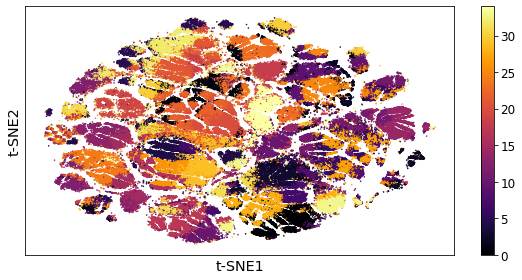

In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.manifold

data_tsne = pd.read_csv('/content/drive/Shared drives/Minería de Datos/Datos/tsne.csv', sep = ',', low_memory=False)
data_tsne = data_tsne[["tsne1" ,"tsne2"]]

scprep.plot.scatter2d(data_tsne, c=y,
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

# DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_pca)

distances, indices = neighbors.kneighbors(X_pca)
distances = np.sort(distances[:,10], axis=0)



Text(0, 0.5, 'Distance')

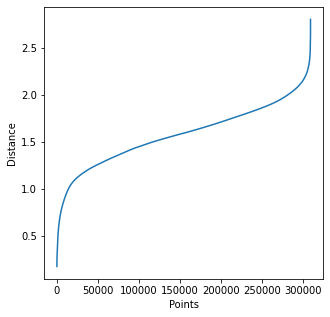

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2.0076673632607913


<Figure size 360x360 with 0 Axes>

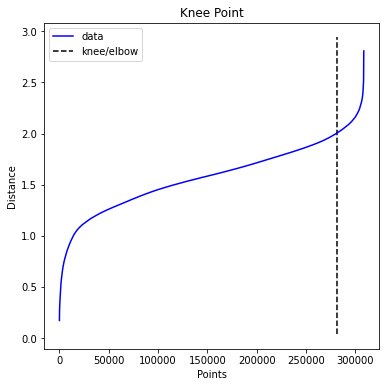

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=1.9, min_samples=8).fit(X_pca)

### Visualizar los datos con T-SNE

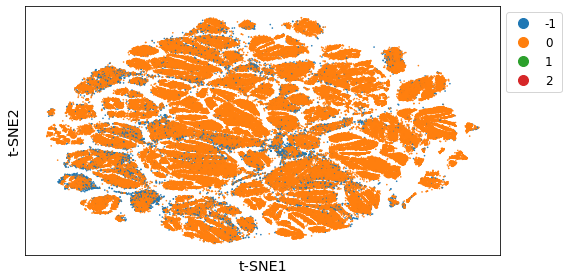

In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.manifold

label = db.labels_

data_tsne = pd.read_csv('/content/drive/Shared drives/Minería de Datos/Datos/tsne.csv', sep = ',', low_memory=False)
data_tsne = data_tsne[["tsne1" ,"tsne2"]]

scprep.plot.scatter2d(data_tsne, c=label,
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

tag = pd.DataFrame(data=label)


In [ ]:
labels=db.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 3


In [ ]:
# Identify Noise
n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 9815


In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data = pd.DataFrame(X_pca)
data = data.assign(Class=Y3)
data= data.assign(predict=labels)
data

data = data[data.predict != -1]



In [ ]:
K1_C0 = data[(data['Class']==0) & (data['predict']==0)]
K2_C0 = data[(data['Class']==0) & (data['predict']==1)]
K3_C0 = data[(data['Class']==0) & (data['predict']==2)]
K1_C1 = data[(data['Class']==1) & (data['predict']==0)]
K2_C1 = data[(data['Class']==1) & (data['predict']==1)]
K3_C1 = data[(data['Class']==1) & (data['predict']==2)]
K1_C2 = data[(data['Class']==2) & (data['predict']==0)]
K2_C2 = data[(data['Class']==2) & (data['predict']==1)]
K3_C2 = data[(data['Class']==2) & (data['predict']==2)]


K1_C0_ = K1_C0.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C1_ = K1_C1.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C2_ = K1_C2.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])

K2_C0_ = K2_C0.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C1_ = K2_C1.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C2_ = K2_C2.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])

K3_C0_ = K3_C0.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C1_ = K3_C1.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C2_ = K3_C2.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])


K1_D = (max( K1_C0_, K1_C1_, K1_C2_))

K2_D = (max( K2_C0_, K2_C1_, K2_C2_))

K3_D = (max( K3_C0_, K3_C1_, K3_C2_))

PUREZA = (K1_D + K2_D + K3_D)/3

print(PUREZA)

0.6863835874595511


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(data["Class"], data["predict"]))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52    105399
           1       0.11      0.00      0.00     96316
           2       0.00      0.00      0.00     97017

    accuracy                           0.35    298732
   macro avg       0.15      0.33      0.17    298732
weighted avg       0.16      0.35      0.18    298732



In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

score = silhouette_score(X_pca, label, metric='euclidean')
print('Coeficiente de silueta: %.3f' % score)

score = davies_bouldin_score(X_pca, label)
print('Indice de Davies-Bouldin: %.3f' % score)

Coeficiente de silueta: 0.020
Indice de Davies-Bouldin: 4.018


# Gaussian Mixture

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.mixture import GaussianMixture


gaussian_model = GaussianMixture(n_components=2)
gaussian_model.fit(X_pca)
gaussian_result = gaussian_model.predict(X_pca)
labels = gaussian_result


In [ ]:
data = pd.DataFrame(X_pca)
data = data.assign(Class=Y2)
data= data.assign(predict=labels)

In [ ]:
K1_C0 = data[(data['Class']==0) & (data['predict']==0)]
K2_C0 = data[(data['Class']==0) & (data['predict']==1)]
K1_C1 = data[(data['Class']==1) & (data['predict']==0)]
K2_C1 = data[(data['Class']==1) & (data['predict']==1)]
K1_C2 = data[(data['Class']==2) & (data['predict']==0)]
K2_C2 = data[(data['Class']==2) & (data['predict']==1)]


K1_C0_ = K1_C0.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C1_ = K1_C1.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C2_ = K1_C2.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])

K2_C0_ = K2_C0.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C1_ = K2_C1.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C2_ = K2_C2.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])


K1_D = (max( K1_C0_, K1_C1_, K1_C2_))

K2_D = (max( K2_C0_, K2_C1_, K2_C2_))

PUREZA = (K1_D + K2_D)/2

print(PUREZA)

0.6296248745123221


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y2, labels))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64    153123
           1       0.64      0.61      0.62    155424

    accuracy                           0.63    308547
   macro avg       0.63      0.63      0.63    308547
weighted avg       0.63      0.63      0.63    308547



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture


gaussian_model = GaussianMixture(n_components=3)
gaussian_model.fit(X_pca)
gaussian_result = gaussian_model.predict(X_pca)
labels = gaussian_result

In [ ]:
data = pd.DataFrame(X_pca)
data = data.assign(Class=Y3)
data= data.assign(predict=labels)

In [ ]:
K1_C0 = data[(data['Class']==0) & (data['predict']==0)]
K2_C0 = data[(data['Class']==0) & (data['predict']==1)]
K3_C0 = data[(data['Class']==0) & (data['predict']==2)]
K1_C1 = data[(data['Class']==1) & (data['predict']==0)]
K2_C1 = data[(data['Class']==1) & (data['predict']==1)]
K3_C1 = data[(data['Class']==1) & (data['predict']==2)]
K1_C2 = data[(data['Class']==2) & (data['predict']==0)]
K2_C2 = data[(data['Class']==2) & (data['predict']==1)]
K3_C2 = data[(data['Class']==2) & (data['predict']==2)]


K1_C0_ = K1_C0.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C1_ = K1_C1.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C2_ = K1_C2.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])

K2_C0_ = K2_C0.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C1_ = K2_C1.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C2_ = K2_C2.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])

K3_C0_ = K3_C0.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C1_ = K3_C1.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C2_ = K3_C2.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])


K1_D = (max( K1_C0_, K1_C1_, K1_C2_))

K2_D = (max( K2_C0_, K2_C1_, K2_C2_))

K3_D = (max( K3_C0_, K3_C1_, K3_C2_))

PUREZA = (K1_D + K2_D + K3_D)/3

print(PUREZA)

0.4290833325581091


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y3, labels))

              precision    recall  f1-score   support

           0       0.46      0.53      0.49    109979
           1       0.30      0.31      0.30     99155
           2       0.35      0.28      0.31     99413

    accuracy                           0.38    308547
   macro avg       0.37      0.37      0.37    308547
weighted avg       0.37      0.38      0.37    308547



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.mixture import GaussianMixture


gaussian_model = GaussianMixture(n_components=35)
gaussian_model.fit(X_pca)
gaussian_result = gaussian_model.predict(X_pca)
labels = gaussian_result

In [ ]:
data = pd.DataFrame(X_pca)
data = data.assign(Class=Y3)
data= data.assign(predict=labels)


In [ ]:

K1_C0 = data[(data['Class']==0) & (data['predict']==0)]
K2_C0 = data[(data['Class']==0) & (data['predict']==1)]
K3_C0 = data[(data['Class']==0) & (data['predict']==2)]
K4_C0 = data[(data['Class']==0) & (data['predict']==3)]
K5_C0 = data[(data['Class']==0) & (data['predict']==4)]
K6_C0 = data[(data['Class']==0) & (data['predict']==5)]
K7_C0 = data[(data['Class']==0) & (data['predict']==6)]
K8_C0 = data[(data['Class']==0) & (data['predict']==7)]
K9_C0 = data[(data['Class']==0) & (data['predict']==8)]
K10_C0 = data[(data['Class']==0) & (data['predict']==9)]
K11_C0 = data[(data['Class']==0) & (data['predict']==10)]
K12_C0 = data[(data['Class']==0) & (data['predict']==11)]
K13_C0 = data[(data['Class']==0) & (data['predict']==12)]
K14_C0 = data[(data['Class']==0) & (data['predict']==13)]
K15_C0 = data[(data['Class']==0) & (data['predict']==14)]
K16_C0 = data[(data['Class']==0) & (data['predict']==15)]
K17_C0 = data[(data['Class']==0) & (data['predict']==16)]
K18_C0 = data[(data['Class']==0) & (data['predict']==17)]
K19_C0 = data[(data['Class']==0) & (data['predict']==18)]
K20_C0 = data[(data['Class']==0) & (data['predict']==19)]
K21_C0 = data[(data['Class']==0) & (data['predict']==20)]
K22_C0 = data[(data['Class']==0) & (data['predict']==21)]
K23_C0 = data[(data['Class']==0) & (data['predict']==22)]
K24_C0 = data[(data['Class']==0) & (data['predict']==23)]
K25_C0 = data[(data['Class']==0) & (data['predict']==24)]
K26_C0 = data[(data['Class']==0) & (data['predict']==25)]
K27_C0 = data[(data['Class']==0) & (data['predict']==26)]
K28_C0 = data[(data['Class']==0) & (data['predict']==27)]
K29_C0 = data[(data['Class']==0) & (data['predict']==28)]
K30_C0 = data[(data['Class']==0) & (data['predict']==29)]
K31_C0 = data[(data['Class']==0) & (data['predict']==30)]
K32_C0 = data[(data['Class']==0) & (data['predict']==31)]
K33_C0 = data[(data['Class']==0) & (data['predict']==32)]
K34_C0 = data[(data['Class']==0) & (data['predict']==33)]
K35_C0 = data[(data['Class']==0) & (data['predict']==34)]

K1_C1 = data[(data['Class']==1) & (data['predict']==0)]
K2_C1 = data[(data['Class']==1) & (data['predict']==1)]
K3_C1 = data[(data['Class']==1) & (data['predict']==2)]
K4_C1 = data[(data['Class']==1) & (data['predict']==3)]
K5_C1 = data[(data['Class']==1) & (data['predict']==4)]
K6_C1 = data[(data['Class']==1) & (data['predict']==5)]
K7_C1 = data[(data['Class']==1) & (data['predict']==6)]
K8_C1 = data[(data['Class']==1) & (data['predict']==7)]
K9_C1 = data[(data['Class']==1) & (data['predict']==8)]
K10_C1 = data[(data['Class']==1) & (data['predict']==9)]
K11_C1 = data[(data['Class']==1) & (data['predict']==10)]
K12_C1 = data[(data['Class']==1) & (data['predict']==11)]
K13_C1 = data[(data['Class']==1) & (data['predict']==12)]
K14_C1 = data[(data['Class']==1) & (data['predict']==13)]
K15_C1 = data[(data['Class']==1) & (data['predict']==14)]
K16_C1 = data[(data['Class']==1) & (data['predict']==15)]
K17_C1 = data[(data['Class']==1) & (data['predict']==16)]
K18_C1 = data[(data['Class']==1) & (data['predict']==17)]
K19_C1 = data[(data['Class']==1) & (data['predict']==18)]
K20_C1 = data[(data['Class']==1) & (data['predict']==19)]
K21_C1 = data[(data['Class']==1) & (data['predict']==20)]
K22_C1 = data[(data['Class']==1) & (data['predict']==21)]
K23_C1 = data[(data['Class']==1) & (data['predict']==22)]
K24_C1 = data[(data['Class']==1) & (data['predict']==23)]
K25_C1 = data[(data['Class']==1) & (data['predict']==24)]
K26_C1 = data[(data['Class']==1) & (data['predict']==25)]
K27_C1 = data[(data['Class']==1) & (data['predict']==26)]
K28_C1 = data[(data['Class']==1) & (data['predict']==27)]
K29_C1 = data[(data['Class']==1) & (data['predict']==28)]
K30_C1 = data[(data['Class']==1) & (data['predict']==29)]
K31_C1 = data[(data['Class']==1) & (data['predict']==30)]
K32_C1 = data[(data['Class']==1) & (data['predict']==31)]
K33_C1 = data[(data['Class']==1) & (data['predict']==32)]
K34_C1 = data[(data['Class']==1) & (data['predict']==33)]
K35_C1 = data[(data['Class']==1) & (data['predict']==34)]


K1_C2 = data[(data['Class']==2) & (data['predict']==0)]
K2_C2 = data[(data['Class']==2) & (data['predict']==1)]
K3_C2 = data[(data['Class']==2) & (data['predict']==2)]
K4_C2 = data[(data['Class']==2) & (data['predict']==3)]
K5_C2 = data[(data['Class']==2) & (data['predict']==4)]
K6_C2 = data[(data['Class']==2) & (data['predict']==5)]
K7_C2 = data[(data['Class']==2) & (data['predict']==6)]
K8_C2 = data[(data['Class']==2) & (data['predict']==7)]
K9_C2 = data[(data['Class']==2) & (data['predict']==8)]
K10_C2 = data[(data['Class']==2) & (data['predict']==9)]
K11_C2 = data[(data['Class']==2) & (data['predict']==10)]
K12_C2 = data[(data['Class']==2) & (data['predict']==11)]
K13_C2 = data[(data['Class']==2) & (data['predict']==12)]
K14_C2 = data[(data['Class']==2) & (data['predict']==13)]
K15_C2 = data[(data['Class']==2) & (data['predict']==14)]
K16_C2 = data[(data['Class']==2) & (data['predict']==15)]
K17_C2 = data[(data['Class']==2) & (data['predict']==16)]
K18_C2 = data[(data['Class']==2) & (data['predict']==17)]
K19_C2 = data[(data['Class']==2) & (data['predict']==18)]
K20_C2 = data[(data['Class']==2) & (data['predict']==19)]
K21_C2 = data[(data['Class']==2) & (data['predict']==20)]
K22_C2 = data[(data['Class']==2) & (data['predict']==21)]
K23_C2 = data[(data['Class']==2) & (data['predict']==22)]
K24_C2 = data[(data['Class']==2) & (data['predict']==23)]
K25_C2 = data[(data['Class']==2) & (data['predict']==24)]
K26_C2 = data[(data['Class']==2) & (data['predict']==25)]
K27_C2 = data[(data['Class']==2) & (data['predict']==26)]
K28_C2 = data[(data['Class']==2) & (data['predict']==27)]
K29_C2 = data[(data['Class']==2) & (data['predict']==28)]
K30_C2 = data[(data['Class']==2) & (data['predict']==29)]
K31_C2 = data[(data['Class']==2) & (data['predict']==30)]
K32_C2 = data[(data['Class']==2) & (data['predict']==31)]
K33_C2 = data[(data['Class']==2) & (data['predict']==32)]
K34_C2 = data[(data['Class']==2) & (data['predict']==33)]
K35_C2 = data[(data['Class']==2) & (data['predict']==34)]

K1_C0_ = K1_C0.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C1_ = K1_C1.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])
K1_C2_ = K1_C2.shape[0]/ (K1_C0.shape[0]+ K1_C1.shape[0] + K1_C2.shape[0])

K2_C0_ = K2_C0.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C1_ = K2_C1.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])
K2_C2_ = K2_C2.shape[0]/ (K2_C0.shape[0]+ K2_C1.shape[0] + K2_C2.shape[0])

K3_C0_ = K3_C0.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C1_ = K3_C1.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])
K3_C2_ = K3_C2.shape[0]/ (K3_C0.shape[0]+ K3_C1.shape[0] + K3_C2.shape[0])

K4_C0_ = K4_C0.shape[0]/ (K4_C0.shape[0]+ K4_C1.shape[0] + K4_C2.shape[0])
K4_C1_ = K4_C1.shape[0]/ (K4_C0.shape[0]+ K4_C1.shape[0] + K4_C2.shape[0])
K4_C2_ = K4_C2.shape[0]/ (K4_C0.shape[0]+ K4_C1.shape[0] + K4_C2.shape[0])

K5_C0_ = K5_C0.shape[0]/ (K5_C0.shape[0]+ K5_C1.shape[0] + K5_C2.shape[0])
K5_C1_ = K5_C1.shape[0]/ (K5_C0.shape[0]+ K5_C1.shape[0] + K5_C2.shape[0])
K5_C2_ = K5_C2.shape[0]/ (K5_C0.shape[0]+ K5_C1.shape[0] + K5_C2.shape[0])

K6_C0_ = K6_C0.shape[0]/ (K6_C0.shape[0]+ K6_C1.shape[0] + K6_C2.shape[0])
K6_C1_ = K6_C1.shape[0]/ (K6_C0.shape[0]+ K6_C1.shape[0] + K6_C2.shape[0])
K6_C2_ = K6_C2.shape[0]/ (K6_C0.shape[0]+ K6_C1.shape[0] + K6_C2.shape[0])

K7_C0_ = K7_C0.shape[0]/ (K7_C0.shape[0]+ K7_C1.shape[0] + K7_C2.shape[0])
K7_C1_ = K7_C1.shape[0]/ (K7_C0.shape[0]+ K7_C1.shape[0] + K7_C2.shape[0])
K7_C2_ = K7_C2.shape[0]/ (K7_C0.shape[0]+ K7_C1.shape[0] + K7_C2.shape[0])

K8_C0_ = K8_C0.shape[0]/ (K8_C0.shape[0]+ K8_C1.shape[0] + K8_C2.shape[0])
K8_C1_ = K8_C1.shape[0]/ (K8_C0.shape[0]+ K8_C1.shape[0] + K8_C2.shape[0])
K8_C2_ = K8_C2.shape[0]/ (K8_C0.shape[0]+ K8_C1.shape[0] + K8_C2.shape[0])

K9_C0_ = K9_C0.shape[0]/ (K9_C0.shape[0]+ K9_C1.shape[0] + K9_C2.shape[0])
K9_C1_ = K9_C1.shape[0]/ (K9_C0.shape[0]+ K9_C1.shape[0] + K9_C2.shape[0])
K9_C2_ = K9_C2.shape[0]/ (K9_C0.shape[0]+ K9_C1.shape[0] + K9_C2.shape[0])

K10_C0_ = K10_C0.shape[0]/ (K10_C0.shape[0]+ K10_C1.shape[0] + K10_C2.shape[0])
K10_C1_ = K10_C1.shape[0]/ (K10_C0.shape[0]+ K10_C1.shape[0] + K10_C2.shape[0])
K10_C2_ = K10_C2.shape[0]/ (K10_C0.shape[0]+ K10_C1.shape[0] + K10_C2.shape[0])

K11_C0_ = K11_C0.shape[0]/ (K11_C0.shape[0]+ K11_C1.shape[0] + K11_C2.shape[0])
K11_C1_ = K11_C1.shape[0]/ (K11_C0.shape[0]+ K11_C1.shape[0] + K11_C2.shape[0])
K11_C2_ = K11_C2.shape[0]/ (K11_C0.shape[0]+ K11_C1.shape[0] + K11_C2.shape[0])

K12_C0_ = K12_C0.shape[0]/ (K12_C0.shape[0]+ K12_C1.shape[0] + K12_C2.shape[0])
K12_C1_ = K12_C1.shape[0]/ (K12_C0.shape[0]+ K12_C1.shape[0] + K12_C2.shape[0])
K12_C2_ = K12_C2.shape[0]/ (K12_C0.shape[0]+ K12_C1.shape[0] + K12_C2.shape[0])

K13_C0_ = K13_C0.shape[0]/ (K13_C0.shape[0]+ K13_C1.shape[0] + K13_C2.shape[0])
K13_C1_ = K13_C1.shape[0]/ (K13_C0.shape[0]+ K13_C1.shape[0] + K13_C2.shape[0])
K13_C2_ = K13_C2.shape[0]/ (K13_C0.shape[0]+ K13_C1.shape[0] + K13_C2.shape[0])

K14_C0_ = K14_C0.shape[0]/ (K14_C0.shape[0]+ K14_C1.shape[0] + K14_C2.shape[0])
K14_C1_ = K14_C1.shape[0]/ (K14_C0.shape[0]+ K14_C1.shape[0] + K14_C2.shape[0])
K14_C2_ = K14_C2.shape[0]/ (K14_C0.shape[0]+ K14_C1.shape[0] + K14_C2.shape[0])

K15_C0_ = K15_C0.shape[0]/ (K15_C0.shape[0]+ K15_C1.shape[0] + K15_C2.shape[0])
K15_C1_ = K15_C1.shape[0]/ (K15_C0.shape[0]+ K15_C1.shape[0] + K15_C2.shape[0])
K15_C2_ = K15_C2.shape[0]/ (K15_C0.shape[0]+ K15_C1.shape[0] + K15_C2.shape[0])

K16_C0_ = K16_C0.shape[0]/ (K16_C0.shape[0]+ K16_C1.shape[0] + K16_C2.shape[0])
K16_C1_ = K16_C1.shape[0]/ (K16_C0.shape[0]+ K16_C1.shape[0] + K16_C2.shape[0])
K16_C2_ = K16_C2.shape[0]/ (K16_C0.shape[0]+ K16_C1.shape[0] + K16_C2.shape[0])

K17_C0_ = K7_C0.shape[0]/ (K17_C0.shape[0]+ K17_C1.shape[0] + K17_C2.shape[0])
K17_C1_ = K7_C1.shape[0]/ (K17_C0.shape[0]+ K17_C1.shape[0] + K17_C2.shape[0])
K17_C2_ = K7_C2.shape[0]/ (K17_C0.shape[0]+ K17_C1.shape[0] + K17_C2.shape[0])

K18_C0_ = K18_C0.shape[0]/ (K18_C0.shape[0]+ K18_C1.shape[0] + K18_C2.shape[0])
K18_C1_ = K18_C1.shape[0]/ (K18_C0.shape[0]+ K18_C1.shape[0] + K18_C2.shape[0])
K18_C2_ = K18_C2.shape[0]/ (K18_C0.shape[0]+ K18_C1.shape[0] + K18_C2.shape[0])

K19_C0_ = K19_C0.shape[0]/ (K19_C0.shape[0]+ K19_C1.shape[0] + K19_C2.shape[0])
K19_C1_ = K19_C1.shape[0]/ (K19_C0.shape[0]+ K19_C1.shape[0] + K19_C2.shape[0])
K19_C2_ = K19_C2.shape[0]/ (K19_C0.shape[0]+ K19_C1.shape[0] + K19_C2.shape[0])

K20_C0_ = K20_C0.shape[0]/ (K20_C0.shape[0]+ K20_C1.shape[0] + K20_C2.shape[0])
K20_C1_ = K20_C1.shape[0]/ (K20_C0.shape[0]+ K20_C1.shape[0] + K20_C2.shape[0])
K20_C2_ = K20_C2.shape[0]/ (K20_C0.shape[0]+ K20_C1.shape[0] + K20_C2.shape[0])

K21_C0_ = K21_C0.shape[0]/ (K21_C0.shape[0]+ K21_C1.shape[0] + K21_C2.shape[0])
K21_C1_ = K21_C1.shape[0]/ (K21_C0.shape[0]+ K21_C1.shape[0] + K21_C2.shape[0])
K21_C2_ = K21_C2.shape[0]/ (K21_C0.shape[0]+ K21_C1.shape[0] + K21_C2.shape[0])

K22_C0_ = K22_C0.shape[0]/ (K22_C0.shape[0]+ K22_C1.shape[0] + K22_C2.shape[0])
K22_C1_ = K22_C1.shape[0]/ (K22_C0.shape[0]+ K22_C1.shape[0] + K22_C2.shape[0])
K22_C2_ = K22_C2.shape[0]/ (K22_C0.shape[0]+ K22_C1.shape[0] + K22_C2.shape[0])

K23_C0_ = K23_C0.shape[0]/ (K23_C0.shape[0]+ K23_C1.shape[0] + K23_C2.shape[0])
K23_C1_ = K23_C1.shape[0]/ (K23_C0.shape[0]+ K23_C1.shape[0] + K23_C2.shape[0])
K23_C2_ = K23_C2.shape[0]/ (K23_C0.shape[0]+ K23_C1.shape[0] + K23_C2.shape[0])

K24_C0_ = K24_C0.shape[0]/ (K24_C0.shape[0]+ K24_C1.shape[0] + K24_C2.shape[0])
K24_C1_ = K24_C1.shape[0]/ (K24_C0.shape[0]+ K24_C1.shape[0] + K24_C2.shape[0])
K24_C2_ = K24_C2.shape[0]/ (K24_C0.shape[0]+ K24_C1.shape[0] + K24_C2.shape[0])

K25_C0_ = K25_C0.shape[0]/ (K25_C0.shape[0]+ K25_C1.shape[0] + K25_C2.shape[0])
K25_C1_ = K25_C1.shape[0]/ (K25_C0.shape[0]+ K25_C1.shape[0] + K25_C2.shape[0])
K25_C2_ = K25_C2.shape[0]/ (K25_C0.shape[0]+ K25_C1.shape[0] + K25_C2.shape[0])

K26_C0_ = K26_C0.shape[0]/ (K26_C0.shape[0]+ K26_C1.shape[0] + K26_C2.shape[0])
K26_C1_ = K26_C1.shape[0]/ (K26_C0.shape[0]+ K26_C1.shape[0] + K26_C2.shape[0])
K26_C2_ = K26_C2.shape[0]/ (K26_C0.shape[0]+ K26_C1.shape[0] + K26_C2.shape[0])

K27_C0_ = K27_C0.shape[0]/ (K27_C0.shape[0]+ K27_C1.shape[0] + K27_C2.shape[0])
K27_C1_ = K27_C1.shape[0]/ (K27_C0.shape[0]+ K27_C1.shape[0] + K27_C2.shape[0])
K27_C2_ = K27_C2.shape[0]/ (K27_C0.shape[0]+ K27_C1.shape[0] + K27_C2.shape[0])

K28_C0_ = K28_C0.shape[0]/ (K28_C0.shape[0]+ K28_C1.shape[0] + K28_C2.shape[0])
K28_C1_ = K28_C1.shape[0]/ (K28_C0.shape[0]+ K28_C1.shape[0] + K28_C2.shape[0])
K28_C2_ = K28_C2.shape[0]/ (K28_C0.shape[0]+ K28_C1.shape[0] + K28_C2.shape[0])

K29_C0_ = K29_C0.shape[0]/ (K29_C0.shape[0]+ K29_C1.shape[0] + K29_C2.shape[0])
K29_C1_ = K29_C1.shape[0]/ (K29_C0.shape[0]+ K29_C1.shape[0] + K29_C2.shape[0])
K29_C2_ = K29_C2.shape[0]/ (K29_C0.shape[0]+ K29_C1.shape[0] + K29_C2.shape[0])

K30_C0_ = K30_C0.shape[0]/ (K30_C0.shape[0]+ K30_C1.shape[0] + K30_C2.shape[0])
K30_C1_ = K30_C1.shape[0]/ (K30_C0.shape[0]+ K30_C1.shape[0] + K30_C2.shape[0])
K30_C2_ = K30_C2.shape[0]/ (K30_C0.shape[0]+ K30_C1.shape[0] + K30_C2.shape[0])

K31_C0_ = K31_C0.shape[0]/ (K31_C0.shape[0]+ K31_C1.shape[0] + K31_C2.shape[0])
K31_C1_ = K31_C1.shape[0]/ (K31_C0.shape[0]+ K31_C1.shape[0] + K31_C2.shape[0])
K31_C2_ = K31_C2.shape[0]/ (K31_C0.shape[0]+ K31_C1.shape[0] + K31_C2.shape[0])

K32_C0_ = K32_C0.shape[0]/ (K32_C0.shape[0]+ K32_C1.shape[0] + K32_C2.shape[0])
K32_C1_ = K32_C1.shape[0]/ (K32_C0.shape[0]+ K32_C1.shape[0] + K32_C2.shape[0])
K32_C2_ = K32_C2.shape[0]/ (K32_C0.shape[0]+ K32_C1.shape[0] + K32_C2.shape[0])

K33_C0_ = K33_C0.shape[0]/ (K33_C0.shape[0]+ K33_C1.shape[0] + K33_C2.shape[0])
K33_C1_ = K33_C1.shape[0]/ (K33_C0.shape[0]+ K33_C1.shape[0] + K33_C2.shape[0])
K33_C2_ = K33_C2.shape[0]/ (K33_C0.shape[0]+ K33_C1.shape[0] + K33_C2.shape[0])

K34_C0_ = K34_C0.shape[0]/ (K34_C0.shape[0]+ K34_C1.shape[0] + K34_C2.shape[0])
K34_C1_ = K34_C1.shape[0]/ (K34_C0.shape[0]+ K34_C1.shape[0] + K34_C2.shape[0])
K34_C2_ = K34_C2.shape[0]/ (K34_C0.shape[0]+ K34_C1.shape[0] + K34_C2.shape[0])

K35_C0_ = K35_C0.shape[0]/ (K35_C0.shape[0]+ K35_C1.shape[0] + K35_C2.shape[0])
K35_C1_ = K35_C1.shape[0]/ (K35_C0.shape[0]+ K35_C1.shape[0] + K35_C2.shape[0])
K35_C2_ = K35_C2.shape[0]/ (K35_C0.shape[0]+ K35_C1.shape[0] + K35_C2.shape[0])




K1_D = (max( K1_C0_, K1_C1_, K1_C2_))
K2_D = (max( K2_C0_, K2_C1_, K2_C2_))
K3_D = (max( K3_C0_, K3_C1_, K3_C2_))
K4_D = (max( K4_C0_, K4_C1_, K4_C2_))
K5_D = (max( K5_C0_, K5_C1_, K5_C2_))
K6_D = (max( K6_C0_, K6_C1_, K6_C2_))
K7_D = (max( K7_C0_, K7_C1_, K7_C2_))
K8_D = (max( K8_C0_, K8_C1_, K8_C2_))
K9_D = (max( K9_C0_, K9_C1_, K9_C2_))
K10_D = (max( K10_C0_, K10_C1_, K10_C2_))
K12_D = (max( K12_C0_, K12_C1_, K12_C2_))
K13_D = (max( K13_C0_, K13_C1_, K13_C2_))
K14_D = (max( K14_C0_, K14_C1_, K14_C2_))
K15_D = (max( K15_C0_, K15_C1_, K15_C2_))
K16_D = (max( K16_C0_, K16_C1_, K16_C2_))
K17_D = (max( K17_C0_, K17_C1_, K17_C2_))
K18_D = (max( K18_C0_, K18_C1_, K18_C2_))
K19_D = (max( K19_C0_, K19_C1_, K19_C2_))
K20_D = (max( K20_C0_, K20_C1_, K20_C2_))
K21_D = (max( K21_C0_, K21_C1_, K21_C2_))
K22_D = (max( K22_C0_, K22_C1_, K22_C2_))
K23_D = (max( K23_C0_, K23_C1_, K23_C2_))
K24_D = (max( K24_C0_, K24_C1_, K24_C2_))
K25_D = (max( K25_C0_, K25_C1_, K25_C2_))
K26_D = (max( K26_C0_, K26_C1_, K26_C2_))
K27_D = (max( K27_C0_, K27_C1_, K27_C2_))
K28_D = (max( K28_C0_, K28_C1_, K28_C2_))
K29_D = (max( K29_C0_, K29_C1_, K29_C2_))
K30_D = (max( K30_C0_, K30_C1_, K30_C2_))
K31_D = (max( K31_C0_, K31_C1_, K31_C2_))
K32_D = (max( K32_C0_, K32_C1_, K32_C2_))
K33_D = (max( K33_C0_, K33_C1_, K33_C2_))
K34_D = (max( K34_C0_, K34_C1_, K34_C2_))
K35_D = (max( K35_C0_, K35_C1_, K35_C2_))



PUREZA = (K1_D + K2_D + K3_D + K4_D + K5_D + K6_D + K7_D + K8_D + K9_D + K10_D + K12_D + K13_D + K14_D + K15_D + K16_D + K17_D + K18_D + K19_D + K20_D + K21_D + K22_D + K23_D + K24_D + K25_D + K26_D + K27_D + K28_D + K29_D + K30_D + K31_D + K32_D + K33_D + K34_D +K35_D)/35
print("------------------------------------")
print("Pureza: ", PUREZA)
print("------------------------------------")

------------------------------------
Pureza:  0.4345187645607849
------------------------------------


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y3, labels))

### Visualizar los datos con T-SNE

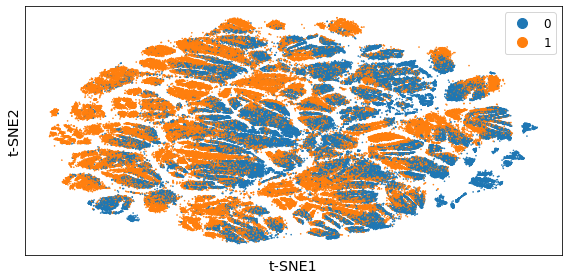

In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.manifold


data_tsne = pd.read_csv('/content/drive/Shared drives/Minería de Datos/Datos/tsne.csv', sep = ',', low_memory=False)
data_tsne = data_tsne[["tsne1" ,"tsne2"]]

scprep.plot.scatter2d(data_tsne, c=labels,
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

score = silhouette_score(X_pca, labels, metric='euclidean')
print('Coeficiente de silueta: %.3f' % score)

score = davies_bouldin_score(X_pca, labels)
print('Indice de Davies-Bouldin: %.3f' % score)

Coeficiente de silueta: 0.044
Indice de Davies-Bouldin: 4.541
